In [2]:
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [3]:
df = pd.read_csv("../../datasets/housing-prices-dataset/numerical_train.csv")

In [4]:
df.head()

,SalePrice,OverallQual,LotArea,EnclosedPorch,TotRmsAbvGrd,MiscVal,KitchenAbvGr,PoolArea,WoodDeckSF,GrLivArea,...,HalfBath,ScreenPorch,BsmtFullBath,LotFrontage,BsmtFinSF1,MasVnrArea,YearBuilt,Fireplaces,MSSubClass,LowQualFinSF
0,208500,7,8450,0,8,0,1,0,0,1710,...,1,0,1,65.0,706,196.0,2003,0,60,0
1,181500,6,9600,0,6,0,1,0,298,1262,...,0,0,0,80.0,978,0.0,1976,1,20,0
2,223500,7,11250,0,6,0,1,0,0,1786,...,1,0,1,68.0,486,162.0,2001,1,60,0
3,140000,7,9550,272,7,0,1,0,0,1717,...,0,0,1,60.0,216,0.0,1915,1,70,0
4,250000,8,14260,0,9,0,1,0,192,2198,...,1,0,1,84.0,655,350.0,2000,1,60,0


In [5]:
df.fillna(1,inplace=True)

### Getting data ready for the model

In [6]:
y = df['SalePrice'].values
df.drop(columns=['SalePrice'],inplace=True)
X = df.values

### Using 3 Degree polynomial

In [7]:
polyFeatures = PolynomialFeatures(2)

In [8]:
X = polyFeatures.fit_transform(X)

In [9]:
X[:10]

array([[1.0000e+00, 7.0000e+00, 8.4500e+03, ..., 3.6000e+03, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.0000e+00, 9.6000e+03, ..., 4.0000e+02, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.0000e+00, 1.1250e+04, ..., 3.6000e+03, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 7.0000e+00, 1.0382e+04, ..., 3.6000e+03, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.0000e+00, 6.1200e+03, ..., 2.5000e+03, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 5.0000e+00, 7.4200e+03, ..., 3.6100e+04, 0.0000e+00,
        0.0000e+00]])

In [10]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.20)

### Model Training

In [39]:
LR1 = Ridge(1000)
LR2 = Lasso(1000)

In [40]:
LR1.fit(x_train,y_train.reshape(-1,1))

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15107e-19): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
LR2.fit(x_train,y_train.reshape(-1,1))

/home/mohsin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162954300780.94666, tolerance: 738793599.2902569
  positive)


Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
val_predictions_1 = LR1.predict(x_val)
val_predictions_2 = LR2.predict(x_val)

### Plotting data and regression line

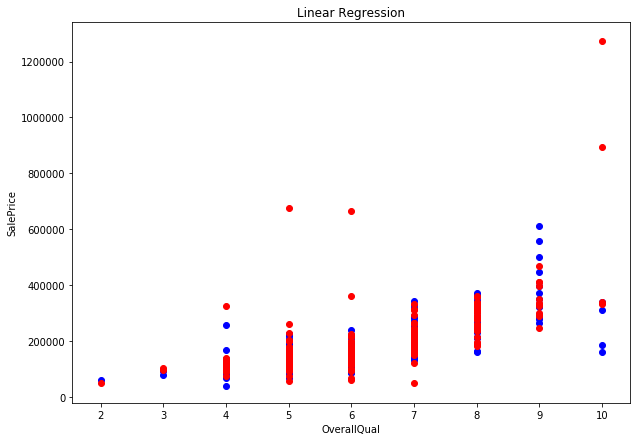

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(x_val[:,1], y_val, color = 'blue') 
plt.scatter(x_val[:,1], LR1.predict(x_val), color = 'red')
#plt.plot(x_val[:,1], LR.predict(x_val), color = 'k')
plt.title('Linear Regression') 
plt.xlabel('OverallQual') 
plt.ylabel('SalePrice')
plt.show()

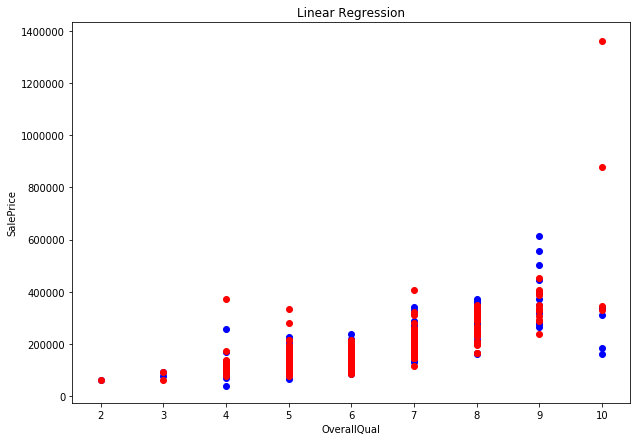

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(x_val[:,1], y_val, color = 'blue') 
plt.scatter(x_val[:,1], LR2.predict(x_val), color = 'red')
#plt.plot(x_val[:,1], LR.predict(x_val), color = 'k')
plt.title('Linear Regression') 
plt.xlabel('OverallQual') 
plt.ylabel('SalePrice')
plt.show()

In [45]:
LR1.score(x_val,y_val.reshape(-1,1))

-0.4160415756875775

In [46]:
LR2.score(x_val,y_val.reshape(-1,1))

-0.23386069440942947

Not quite good results